# Hyperparameter Tuning Methods Comparison
Cross validation approach based on the following [repo](https://github.com/roamanalytics/roamresearch/tree/master/BlogPosts/Hyperparameter_tuning_comparison)

In [1]:
%matplotlib inline

In [30]:
import dataset_loader as datasets
import model_loader as models
import seaborn as sns
from hpt_cmp import *

In [3]:
%load_ext autoreload
%aimport hpt_cmp
%aimport dataset_loader
%autoreload 2

In [4]:
MLP = models.load_MLPClassifier()

In [14]:
from __future__ import print_function
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

In [15]:
# Loading the Digits dataset
mth = 'load_'+'digits'
digits = datasets.load_digits()
iris = datasets.load_iris()
wine = datasets.load_wine()
bc = datasets.load_breast_cancer()
cs = datasets.load_census_50k()

all_datasets = [digits]
# To apply an classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:

In [32]:
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],  
    'gamma': [0.0001, 0.001, 0.01, 0.1, 1.0],
    'kernel': ['rbf', 'linear']
}

bayes_grid ={
    'C': (0.1, 100, 'log-uniform'),
    'gamma': (0.0001, 1, 'log-uniform'),
    'kernel': ['rbf', 'linear']
}

hyperopt_grid = {
    'C': hp.loguniform('C', np.log(0.1),np.log(1000)),
    'gamma': hp.choice('gamma',[0.0001, 0.001, 0.01, 0.1, 1.0]),
    'kernel': hp.choice('kernel', ['rbf', 'linear'])
}

In [33]:
hpt_objs = [
    # add more objs once more search functions implemented
        ('Baseline', {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}, run_baseline, {}),
        ('BaysianSearch', bayes_grid,baysian_search,{'n_iter':MAX_ITER}),
        ('Tree of Parzen Estimator',hyperopt_grid,tpe_search,{}),
        ('RandomSearch', param_grid, random_search,{'n_iter':MAX_ITER}),
        ('GridSearch', param_grid, grid_search, {}),
]

#### cmp_hpt_methods
Parameter description
> `htp_objs`: list of hyperparam-tuning object <br>
> `model`: sklearn model to optimize (needs to have fit/predict function)<br>
> `dataset`: tuple of (X,y) e.g (Data, Target) <br>
> `loss`: sklearn loss function to user <br>
> `metric`: sklearn metric to optimize for <br>
> `datset_split`: random_state for datasetsplit <br>
> `name`: currently not user *optional* <br>

In [34]:
all_results = []

for ds in all_datasets:
# Run search & print result
    results = cmp_hpt_methods(
        (ds.data, ds.target),
        hpt_objs,
        SVC,
        'accuracy', #http://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
        accuracy_score, name='SVC')
    all_results.append(results)

20 3


/home/tonia/uni/ml/Hyper-Parameter-Tuning/env/lib64/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/tonia/uni/ml/Hyper-Parameter-Tuning/env/lib64/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/tonia/uni/ml/Hyper-Parameter-Tuning/env/lib64/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*war

In [35]:
sum_res = []
for r in all_results[0]:
    sum_res.append((r[HPT_METHOD], r[CV_TIME],len(r[INNER_RES]['params']), r[TEST_ACC], r[BEST_PARAMS], np.array(r[INNER_RES]['mean_test_score']).mean() ))

df = pd.DataFrame(sum_res, columns=[HPT_METHOD, 'TIME', PARAMS_SAMPLED, TEST_ACC, BEST_PARAMS, 'SCORE'])

In [36]:
df

,HPT method,TIME,Parameters sampled,Test accuracy,Best Parameters,SCORE
0,Baseline,0.411516,1,0.968519,"{'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}",0.962556
1,BaysianSearch,21.713631,20,0.987037,"{'C': 40.12228446050784, 'gamma': 0.0005224817...",0.847772
2,Tree of Parzen Estimator,7.541564,20,0.992593,"{'C': 1.2189385282856182, 'gamma': 0.001, 'ker...",0.820189
3,RandomSearch,8.115160,20,0.988889,"{'kernel': 'rbf', 'gamma': 0.001, 'C': 1000}",0.820684
4,GridSearch,21.292679,50,0.992593,"{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}",0.758552


In [37]:
pd.DataFrame(df[BEST_PARAMS].tolist())

,C,gamma,kernel
0,1.000000,0.000100,rbf
1,40.122284,0.000522,rbf
2,1.218939,0.001000,rbf
3,1000.000000,0.001000,rbf
4,1.000000,0.001000,rbf


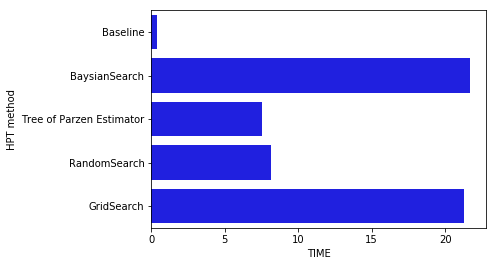

<Figure size 432x288 with 0 Axes>

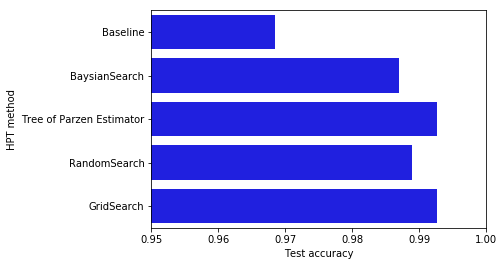

In [38]:
# plot comparison
plt.figure()
sns.barplot(x='TIME', y=HPT_METHOD,data =df, color='b')
plt.figure()
# plot accuracy comparison
fig, ax =plt.subplots()
ax.set(xlim=(0.95, 1.0))
sns.barplot(x=TEST_ACC, y=HPT_METHOD, ax = ax,data =df, color='b')

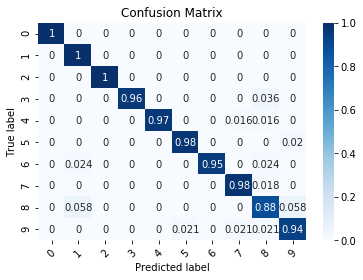

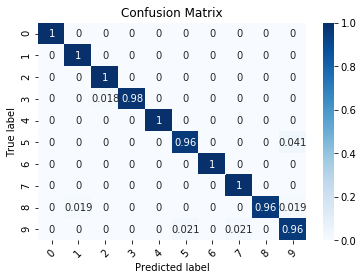

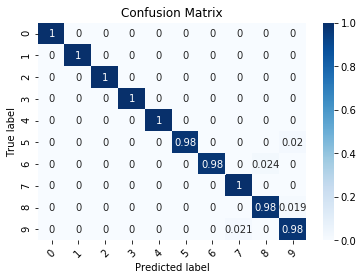

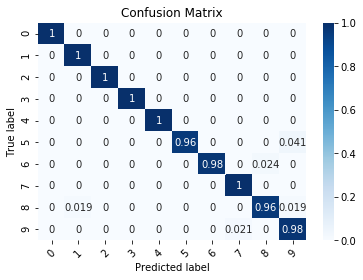

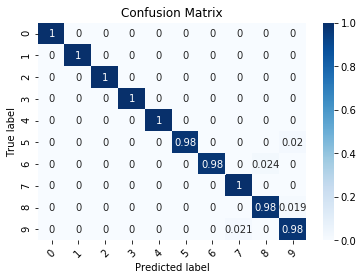

In [44]:
for r in all_results[0]:
    plot_confusion_matrix(r[CONF_MATRIX], digits.target_names)